<a href="https://colab.research.google.com/github/kurexi/fml-labs/blob/main/FML_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3
## Part 1: Logistic Regression from Scratch
### Step 1: The Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# load dataset
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# --- Case 1: Not linearly separable (Versicolor vs . Virginica) ---
X_nls_full = X[y != 0]
y_nls_full = y[y != 0]
y_nls_full[y_nls_full == 1] = 0
y_nls_full[y_nls_full == 2] = 1

X_train_nls, X_test_nls, y_train_nls, y_test_nls = train_test_split(
    X_nls_full, y_nls_full, test_size=0.3, random_state=42
)

# -- Case 2: Lineraly Seprable (Setosa vs. The Rest) ---
X_ls_full = X
y_ls_full = np.copy(y)
y_ls_full[y_ls_full != 0] = 1 # Versicolor and Virginica are class 1
X_train_ls, X_test_ls, y_train_ls, y_test_ls = train_test_split(
    X_ls_full, y_ls_full, test_size=0.3, random_state=42
)

# Helper function to add the bias term (x0=1)
def add_bias(X):
  return np.c_[np.ones(X.shape[0]), X]

### Step 2: Implement the Core Functions

In [ ]:
def sigmoid(a):
  return 1.0 / (1.0 + np.exp(-a))

def nll_loss(y_true, y_pred):
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def calculate_gradient(X, y_true, w):
  n, d = X.shape
  pred = predict(X, w)
  diff = (pred - y_true)
  scale = X.T @ diff / n
  return scale

def predict(X, w):
  return sigmoid(X @ w.T)

### Step 3: Implement the Training Loop

In [ ]:
def train_logistic_regression(X, y, learning_rate=0.1, iteration=10):
  X_with_bias = add_bias(X)
  n, d = X_with_bias.shape

  # init the weights
  w = np.ones(d)

  loss_history = np.zeros(iteration)
  gradient_norm_history = np.zeros(iteration)
  w_norm_history = np.zeros(iteration)

  for i in range(iteration):
    pred = predict(X_with_bias, w)
    loss_history[i] = nll_loss(y, pred)
    g = calculate_gradient(X_with_bias, y, w)
    w = w - learning_rate * g
    gradient_norm_history[i] = np.linalg.norm(g)
    w_norm_history[i] = np.linalg.norm(w)

  return w, loss_history, gradient_norm_history, w_norm_history

def plot(loss_history, gradient_history, weight_history):
  import matplotlib.pyplot as plt

  plt.plot(loss_history, label='loss')
  plt.plot(gradient_history, label='gradient norm')
  plt.plot(weight_history, label='weight norm')
  plt.yscale('log')
  plt.legend()
  plt.show()

def visualize_learned_result(X, y, w):
  zero = X[y == 0]
  one = X[y == 1]
  plt.scatter(zero[:,0], zero[:,1])
  plt.scatter(one[:,0], one[:,1])
  x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
  y_values = (-w[0] - w[1] * x_values) / w[2]
  plt.plot(x_values, y_values, c='red')
  plt.show()

### Step 4: Experiments and Comparision
#### Task 1: Non-Linearly Separable Case

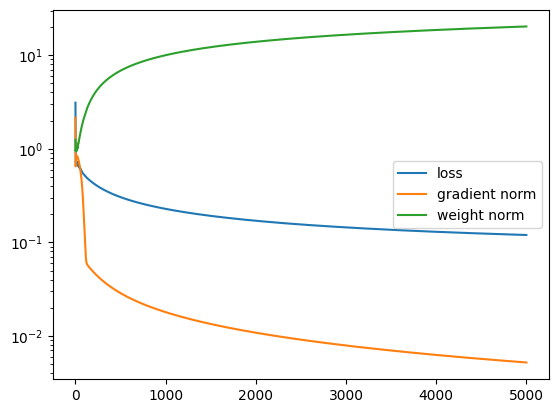

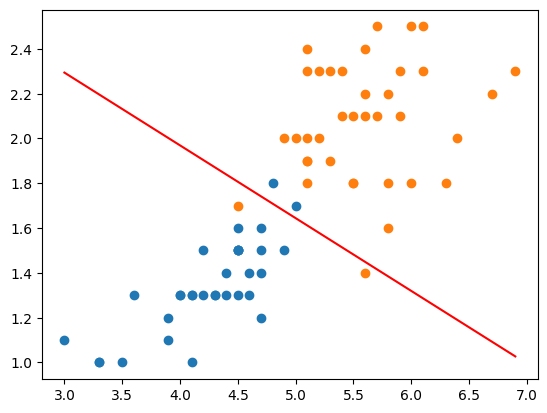

(np.float64(0.11984926109422778),
 np.float64(0.005203623507008494),
 np.float64(20.261868957696045))

In [ ]:
import matplotlib.pyplot as plt

w, l_history, g_history, w_history = train_logistic_regression(X_train_nls, y_train_nls, learning_rate=0.3, iteration=5000)
plot(l_history, g_history, w_history)
visualize_learned_result(X_train_nls, y_train_nls, w)
l_history[-1], g_history[-1], w_history[-1]


#### Task 2: Lineary Seprable Case

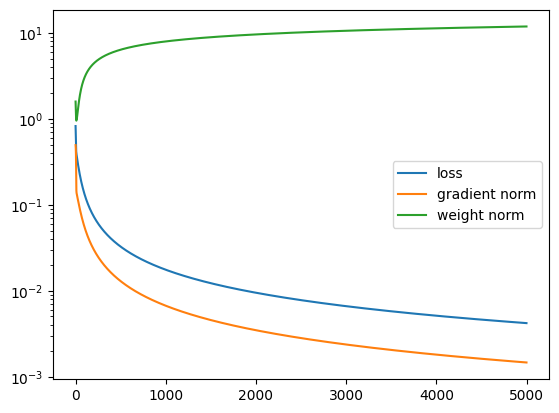

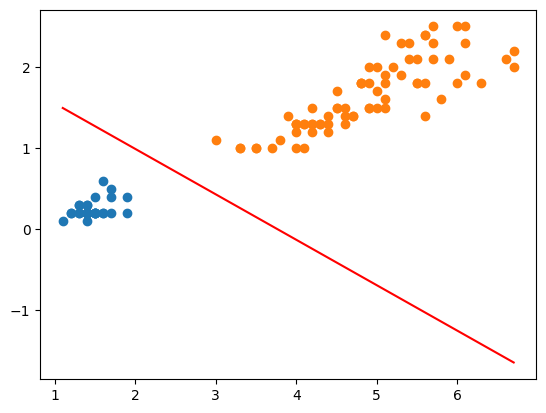

(np.float64(0.0041867909522563945),
 np.float64(0.001458700515664184),
 np.float64(11.825267313649867))

In [ ]:
import matplotlib.pyplot as plt

w, l_history, g_history, w_history = train_logistic_regression(X_train_ls, y_train_ls, learning_rate=0.35, iteration=5000)
plot(l_history, g_history, w_history)
visualize_learned_result(X_train_ls, y_train_ls, w)
l_history[-1], g_history[-1], w_history[-1]

### Step 5: Fixing the Problem with L2 Regularization
#### Task 3: Implement L2 Regularized Logistic Regression

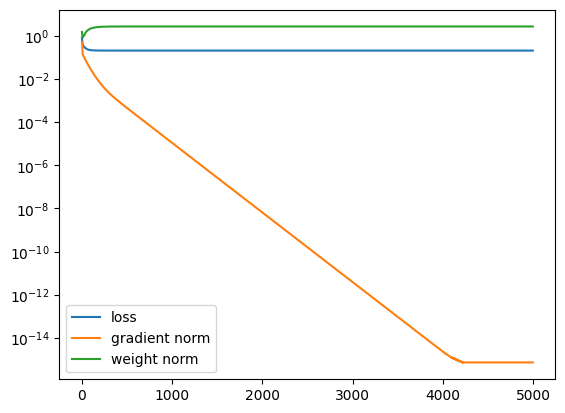

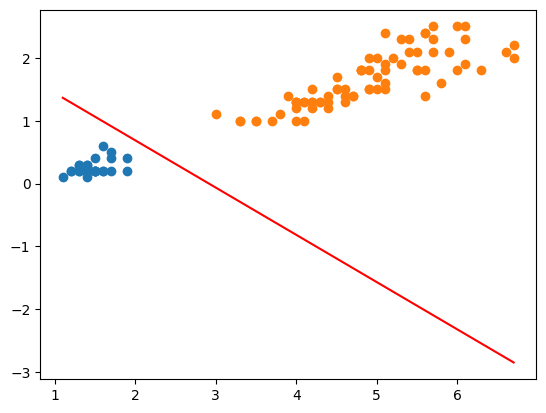

(np.float64(0.21480300791592455),
 np.float64(7.064819758140363e-16),
 np.float64(2.8291111768595645))

In [ ]:
def loss_regularized(y_true, y_pred, w, lambda_):
  return nll_loss(y_true, y_pred) + w @ w.T * lambda_

def calculate_gradient_regularized(X, y_true, w, lambda_):
  return calculate_gradient(X, y_true, w) + 2 * lambda_ * w

def train_regularized_lr(X, y, lambda_=0.1, learning_rate=0.1, iteration=10):
  X_with_bias = add_bias(X)
  n, d = X_with_bias.shape

  # init the weights
  w = np.ones(d)

  loss_history = np.zeros(iteration)
  gradient_norm_history = np.zeros(iteration)
  w_norm_history = np.zeros(iteration)

  for i in range(iteration):
    pred = predict(X_with_bias, w)
    loss_history[i] = loss_regularized(y, pred, w, lambda_)
    g = calculate_gradient_regularized(X_with_bias, y, w, lambda_)
    w = w - learning_rate * g
    gradient_norm_history[i] = np.linalg.norm(g)
    w_norm_history[i] = np.linalg.norm(w)

  return w, loss_history, gradient_norm_history, w_norm_history

import matplotlib.pyplot as plt

w, l_history, g_history, w_history = train_regularized_lr(X_train_ls, y_train_ls, lambda_=0.01, learning_rate=0.35, iteration=5000)
plot(l_history, g_history, w_history)
visualize_learned_result(X_train_ls, y_train_ls, w)
l_history[-1], g_history[-1], w_history[-1]

### Step 6: Evaluate Model Performance
#### Task 4: Evaluate your Regularized Classifier

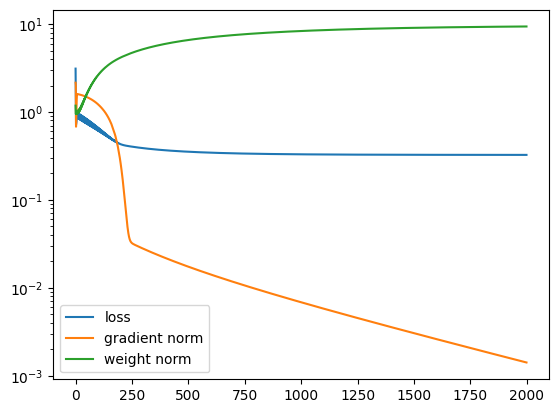

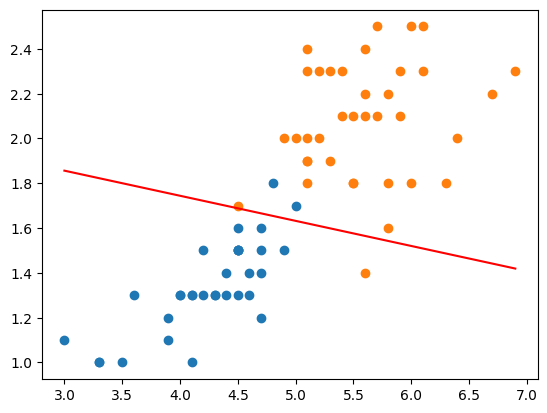

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

w, l_history, g_history, w_history = train_regularized_lr(X_train_nls, y_train_nls, 0.001, learning_rate=0.35, iteration=2000)
plot(l_history, g_history, w_history)
visualize_learned_result(X_train_nls, y_train_nls, w)

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30


--- Confusion Matrix ---
[[17  0]
 [ 2 11]]

AUC Score: 0.9910


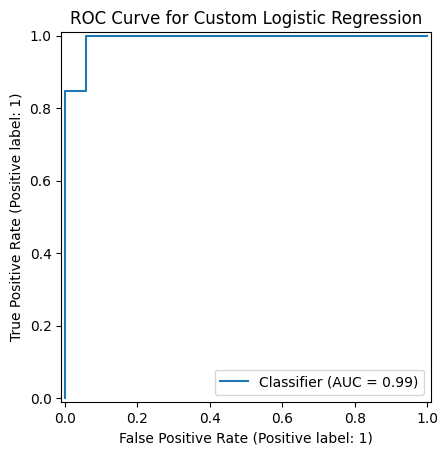


Predicted probabilities range: 0.04254586934777072 - 0.962632668093967


In [ ]:
X_test_nls_bias = add_bias(X_test_nls)
probablities = predict(X_test_nls_bias, w)
y_pred = (probablities > 0.5).astype(int)


print("--- Classification Report ---")
print(classification_report(y_test_nls, y_pred))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test_nls, y_pred))


print(f"\nAUC Score: {roc_auc_score(y_test_nls, probablities):.4f}")


RocCurveDisplay.from_predictions(y_test_nls, probablities)
plt.title("ROC Curve for Custom Logistic Regression")
plt.show()

print("\nPredicted probabilities range:", np.min(probablities), "-", np.max(probablities))

## Part 2: Naive Bayes
### Task 1: Intuition Building - Spam Classification by Hand

In [ ]:
# Training data
training_dataset = np.array([
    ["free money offer now", 'Spam'],
    ["call me now", 'Spam'],
    ["did you get the money", 'Ham'],
    ["can you call me later", 'Ham'],
    ["let's meet later", 'Ham']
])

X = np.array(training_dataset[:,0])
y = np.array(training_dataset[:,1])
y[y == 'Spam'] = 1
y[y == 'Ham'] = 0
y = y.astype(int)

test_sentence_words = "free call for you".split(' ')

prior_spam = np.sum(y) / y.size
prior_ham = 1 - prior_spam

print("P(Spam):", prior_spam)
print("P(Ham):", prior_ham)

n = X.shape[0]

# --- data structures ---
#  -- word counts --
# word | spam |  ham
# -----|------|------
# free |    1 |    0
# .... |   .. |   ..
#
#  -- word likelihoods --
# word |  spam  |  ham
# -----|--------|--------
# free | 0.0001 | 0.0001

word_counts = {}

for data in training_dataset:
  class_ = data[1]
  words_in_sentence = data[0].split(' ')
  for word in words_in_sentence:
    if not word in word_counts.keys():
      word_counts[word] = {"Spam": 0, "Ham": 0}
    word_counts[word][class_] += 1

# add words from test sentence to dictionary
for word in test_sentence_words:
  if not word in word_counts:
    word_counts[word] = {"Spam": 0, "Ham": 0}

word_likelihoods = {}
for word in word_counts:
  counts = word_counts[word]
  for class_ in counts:
    word_in_class = word_counts[word][class_]
    total_words_in_class = sum(inner_dict[class_] for inner_dict in word_counts.values())
    probablity = (word_in_class + 1) / (total_words_in_class + len(word_counts))
    if not word in word_likelihoods.keys():
      word_likelihoods[word] = {"Smap": 0.0, "Ham": 0.0}
    word_likelihoods[word][class_] = probablity

print("P(free|Spam):", word_likelihoods["free"]["Spam"])
print("P(free|Ham):", word_likelihoods["free"]["Ham"])
print("P(call|Spam):", word_likelihoods["call"]["Spam"])
print("P(call|Ham):", word_likelihoods["call"]["Ham"])

def class_conditional_destity(sample, class_):
  """
  input:
  sapmple: list of words
  calss_: target class
  """

  density = 1
  for word in sample:
    density *= word_likelihoods[word][class_]
  return density

def posterior(sample, class_):
  """
  input:
  sapmple: list of words
  calss_: target class
  """
  target_conditional_destity = class_conditional_destity(sample, class_)
  total_conditional_destity = class_conditional_destity(sample, "Ham") + class_conditional_destity(sample, "Spam")
  return target_conditional_destity / total_conditional_destity

print("Score(Spam):", posterior(test_sentence_words, "Spam"))
print("Score(Ham):", posterior(test_sentence_words, "Ham"))
result = "Spam" if posterior(test_sentence_words, "Spam") > posterior(test_sentence_words, "Ham") else "Ham"
print(f"According to the scores, the test sentence \"{' '. join(test_sentence_words)}\" is classified as: {result}")


P(Spam): 0.4
P(Ham): 0.6
P(free|Spam): 0.09090909090909091
P(free|Ham): 0.03571428571428571
P(call|Spam): 0.09090909090909091
P(call|Ham): 0.07142857142857142
Score(Spam): 0.6362635087574015
Score(Ham): 0.36373649124259855
According to the scores, the test sentence "free call for you" is classified as: Spam


### Task 2: Application - Real-World Text Classification
#### Step 1: Load the Dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups

categories = ['sci.space', 'talk.religion.misc']
train_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

Step 2: Feature Extraction (Bag-of-Words)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_data.data)
X_test = vectorizer.transform(test_data.data)
y_train = train_data.target
y_test = test_data.target

Step 3: Train and Evalute a Multinomial Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=train_data.target_names))

                    precision    recall  f1-score   support

         sci.space       0.97      0.99      0.98       394
talk.religion.misc       0.99      0.96      0.97       251

          accuracy                           0.98       645
         macro avg       0.98      0.98      0.98       645
      weighted avg       0.98      0.98      0.98       645



Step 4: Hands-on Analysis - Looking Inside the Model

In [ ]:
doc_index = 10
doc_vector = X_test[doc_index]

model_prediction = model.predict(doc_vector)[0]
predicted_class_name = train_data.target_names[model_prediction]

print(f"Model's Prediction: '{predicted_class_name}'")

# --- Manually calculate the score for each class ---
log_prior_space = model.class_log_prior_[0]
log_prior_religion = model.class_log_prior_[1]

log_likelihoods_space = model.feature_log_prob_[0, :]
log_likelihoods_religion = model.feature_log_prob_[1, :]

# The dot product sums the log-likelihoods for the words present in the document
score_space = log_prior_space + doc_vector.dot(log_likelihoods_space)
score_religion = log_prior_religion + doc_vector.dot(log_likelihoods_religion)


calculated_prediction = 0 if score_space > score_religion else 1
calculated_result = train_data.target_names[calculated_prediction]
print(f"Calculated Result: '{calculated_result}'")

Model's Prediction: 'talk.religion.misc'
Calculated Result: 'talk.religion.misc'
